# FSC7114 - Introdução à Física Computacional
## Projeto final
### Nome: Seu Nome

## Análise de dados experimentais

Baixe no moodle o arquivo `galaxias.txt`. Esse arquivo contém uma tabela com dados de algumas galáxias observadas pelo [SDSS](https://www.sdss.org/). A tabela consiste num arrays de 18525 linhas por 5 colunas. Cada linha representa uma galáxia, e cada coluna uma informação diferente.

0. magnitude absoluta na banda $g$: $M_g$
1. magnitude absoluta na banda $r$: $M_r$
2. magnitude aparente na banda $r$: $m_r$
3. redshift (desvio para o vermelho): $z$
4. índice de concentração na band $r$: $\mathrm{CI}_r$

Podemos ler essa tabela usando a função `numpy.genfromtxt()`.

In [ ]:
import numpy as np

t = np.genfromtxt('galaxias.txt')

### Item 1

Separe o array `t` em 5 arrays unidimensionais, um com cada coluna.

In [ ]:
import numpy as np

# Lendo os dados do arquivo galaxias.txt
t = np.genfromtxt('galaxias.txt')

# Separando as colunas em arrays unidimensionais
Mg = t[:, 0]  # Magnitude absoluta na banda g
Mr = t[:, 1]  # Magnitude absoluta na banda r
mr = t[:, 2]  # Magnitude aparente na banda r
z = t[:, 3]   # Redshift (desvio para o vermelho)
CIr = t[:, 4] # Índice de concentração na banda r

# Agora você tem 5 arrays unidimensionais: Mg, Mr, mr, z, CIr


### Item 2

O redshift $z$ é, segundo a lei de Hubble-Lemaître, proporcional à distância da galáxia. A magnitude aparente é o logaritmo do brilho aparente de uma galáxia, numa escala negativa, em um determinado filtro. Isto é,

$$
m_\nu = -2.5 \log F_\nu + C.
$$

Quanto menor o número, mais brilhante é o objeto. Vamos selecionar uma amostra limitada em distância e brilho aparente, para ficar com galáxias próximas e mais brilhantes. Crie uma máscara de seleção (um array com valores booleanos) com os critérios: $z < 0.1$ e $m_r < 17$.

In [ ]:
mask = (z < 0.1) & (mr < 17)


[ True  True  True ... False False  True]


### Item 3

Faça o gráfico de $(M_g - M_r) \times M_r$ desta amostra. Aqui vamos usar magnitudes absolutas, isto é, relacionadas ao brilho intrínseco das galáxias, descontando o termo que cai com o quadrado da distância. Como estão em log, $(M_g - M_r)$ é porporcional à razão de fluxos nos filtros $g$ (azul-verde) e $r$ (vermelho). Esta diferença quer dizer: quão mais brilhante a galáxia é no filtro $g$ em relação ao filtro $r$. Portanto, $(M_g - M_r)$ codifica uma cor.

Assim, esse é um diagrama de cor em função do brilho intrínseco. Limites recomendados para o gráfico: $-24 \leq M_r \leq -17$ e $0 \leq (M_g - M_r) \leq 1$.

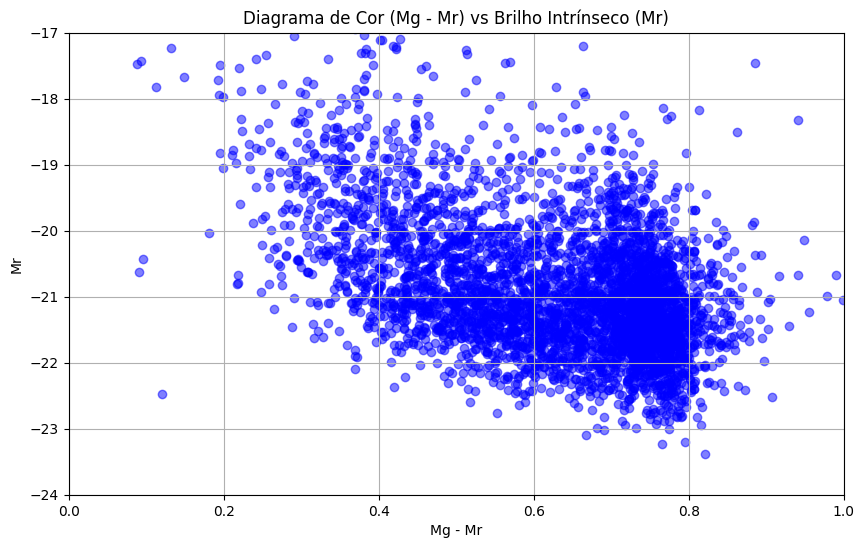

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Lendo os dados do arquivo galaxias.txt
t = np.genfromtxt('galaxias.txt')

# Separando as colunas em arrays unidimensionais
Mg = t[:, 0]  # Magnitude absoluta na banda g
Mr = t[:, 1]  # Magnitude absoluta na banda r
z = t[:, 3]   # Redshift
mr = t[:, 2]  # Magnitude aparente na banda r

# Criando a máscara de seleção
mask = (z < 0.1) & (mr < 17)

# Filtrando os dados de acordo com a máscara
Mg_selected = Mg[mask]
Mr_selected = Mr[mask]

# Calculando (Mg - Mr)
color = Mg_selected - Mr_selected

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.scatter(color, Mr_selected, c='blue', alpha=0.5)

# Definindo limites para o gráfico
plt.xlim(0, 1)       # Limites para (Mg - Mr)
plt.ylim(-24, -17)   # Limites para Mr

# Adicionando rótulos aos eixos e título
plt.xlabel('Mg - Mr')
plt.ylabel('Mr')
plt.title('Diagrama de Cor (Mg - Mr) vs Brilho Intrínseco (Mr)')

# Exibindo a grade
plt.grid()

# Mostrando o gráfico
plt.show()


### Item 4

Repare que há um acúmulo de galáxias na parte superior e uma conjunto mais difuso abaixo. Esse grupo mais acima tem cor mais avermelhada, e é chamado de *sequência vermelha*. O outro grupo abaixo é chamado de *núvem azul*. São galáxias de características diferentes: tipicamente, as vemelhas são elípticas e as azuis são espirais.

Podemos diferenciar as duas usando o índice de concentração $\mathrm{CI}_r$, que mede quanto da luz da galáxia está concentrada no seu núcleo. Galáxias espirais têm $\mathrm{CI}_r < 2.5$, enquanto as elípticas têm $\mathrm{CI}_r > 2.5$. Faça máscaras para escolher esses dois tipos de galáxias, e então faça dois scatterplots no mesmo gráfico, cada um com uma cor diferente.

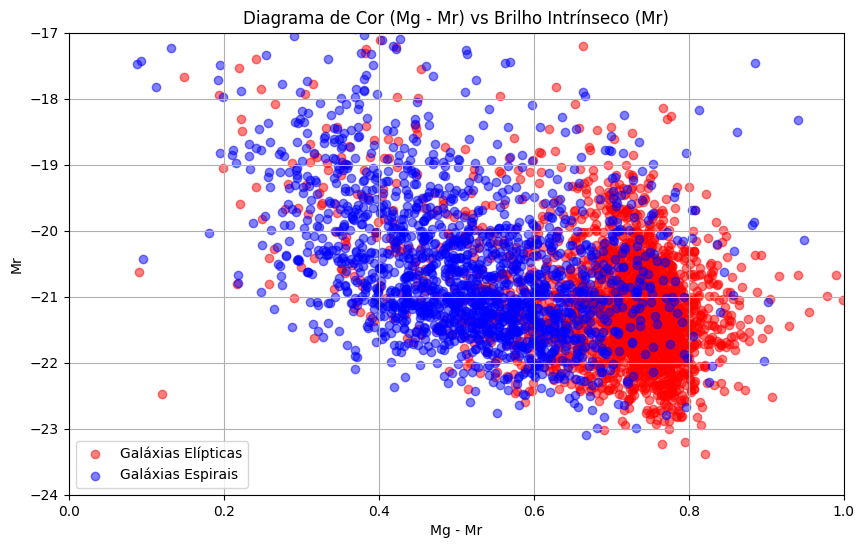

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Lendo os dados do arquivo galaxias.txt
t = np.genfromtxt('galaxias.txt')

# Separando as colunas em arrays unidimensionais
Mg = t[:, 0]  # Magnitude absoluta na banda g
Mr = t[:, 1]  # Magnitude absoluta na banda r
z = t[:, 3]   # Redshift
mr = t[:, 2]  # Magnitude aparente na banda r
CIr = t[:, 4] # Índice de concentração na banda r

# Criando a máscara de seleção para galáxias próximas e brilhantes
mask = (z < 0.1) & (mr < 17)

# Filtrando os dados de acordo com a máscara
Mg_selected = Mg[mask]
Mr_selected = Mr[mask]
CIr_selected = CIr[mask]

# Calculando (Mg - Mr)
color = Mg_selected - Mr_selected

# Criando máscaras para os dois tipos de galáxias
mask_elliptical = CIr_selected > 2.5
mask_spiral = CIr_selected < 2.5

# Filtrando os dados para cada tipo de galáxia
color_elliptical = color[mask_elliptical]
Mr_elliptical = Mr_selected[mask_elliptical]

color_spiral = color[mask_spiral]
Mr_spiral = Mr_selected[mask_spiral]

# Criando o gráfico
plt.figure(figsize=(10, 6))

# Plotando as galáxias elípticas em vermelho
plt.scatter(color_elliptical, Mr_elliptical, c='red', label='Galáxias Elípticas', alpha=0.5)

# Plotando as galáxias espirais em azul
plt.scatter(color_spiral, Mr_spiral, c='blue', label='Galáxias Espirais', alpha=0.5)

# Definindo limites para o gráfico
plt.xlim(0, 1)       # Limites para (Mg - Mr)
plt.ylim(-24, -17)   # Limites para Mr

# Adicionando rótulos aos eixos e título
plt.xlabel('Mg - Mr')
plt.ylabel('Mr')
plt.title('Diagrama de Cor (Mg - Mr) vs Brilho Intrínseco (Mr)')

# Adicionando a legenda
plt.legend()

# Exibindo a grade
plt.grid()

# Mostrando o gráfico
plt.show()


Parabéns, você agora é um(a) astrofísico(a) extragalático(a)!